<a href="https://colab.research.google.com/github/sripujitha000/DEEP-LEARNING/blob/main/exp1_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
print("Loading the MNIST datasets...")
(X_train, y_train), (X_test, y_test)= mnist.load_data()
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")
print(X_train[0])
print(y_train[0])
print(y_train[0])

Loading the MNIST datasets...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225

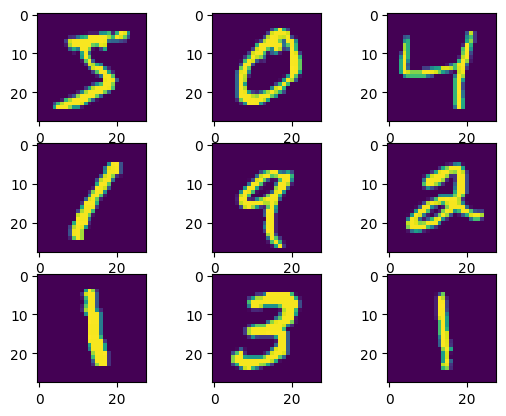

In [ ]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])

In [ ]:
print("\nReshaping the input data...")
X_train= X_train.reshape(X_train.shape[0], 28*28)
X_test= X_test.reshape(X_test.shape[0], 28*28)
print(f"Reshaped training data shape: {X_train.shape}")
print(f"Reshaped testing data shape: {X_test.shape}")
print(X_train[0])


Reshaping the input data...
Reshaped training data shape: (60000, 784)
Reshaped testing data shape: (10000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  

In [ ]:
print("\nNormalizing the input data...")
X_train= X_train / 255.0
X_test= X_test / 255.0
print("Normalization complete.Pixel values are between 0 and 1")


Normalizing the input data...
Normalization complete.Pixel values are between 0 and 1


In [ ]:
print("\nOne-hot encoding the target variables...")
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)
print(f"Encoded training labels shape: {y_train.shape}")
print(f"Encoded testing labels shape: {y_test.shape}")


One-hot encoding the target variables...
Encoded training labels shape: (60000, 10)
Encoded testing labels shape: (10000, 10)


In [ ]:
print("\nDefining the neural network model...")
model= Sequential()
model.add(Dense(512, input_shape= (784,), activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(512,activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation= "softmax"))
print("Model architecture defined.")


Defining the neural network model...
Model architecture defined.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print("\nCompiling the model...")
model.compile(loss= "categorical_crossentropy", optimizer= "adam", metrics= ["accuracy"])
print("Model compiled with categorical cross-entropy loss and Adam optimizer.")


Compiling the model...
Model compiled with categorical cross-entropy loss and Adam optimizer.


In [ ]:
print("\nStarting the training process...")
history= model.fit(X_train, y_train, batch_size= 128, epochs= 10, verbose= 1, validation_data= (X_test, y_test))
print("Training completed.")


Starting the training process...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8627 - loss: 0.4554 - val_accuracy: 0.9652 - val_loss: 0.1084
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9670 - loss: 0.1065 - val_accuracy: 0.9736 - val_loss: 0.0831
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9772 - loss: 0.0717 - val_accuracy: 0.9808 - val_loss: 0.0649
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9832 - loss: 0.0520 - val_accuracy: 0.9814 - val_loss: 0.0598
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9867 - loss: 0.0412 - val_accuracy: 0.9815 - val_loss: 0.0634
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9883 - loss: 0.0370 - val_accuracy: 0.9823 - val_loss: 0.0649
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9900 - loss: 0.0310 - val_accuracy: 0.9792 - val_loss: 0.0727
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - a

In [ ]:
print("\nEvaluating the model...")
score = model.evaluate(X_test, y_test, verbose= 0)
print(f"Test Accuracy:{score[1]*100:.2f}%")


Evaluating the model...
Test Accuracy:97.94%


In [ ]:
print("\nTraining history:")
print(f"Training Accuracy: {history.history['accuracy'][-1]:.2f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.2f}")


Training history:
Training Accuracy: 0.99
Validation Accuracy: 0.98
